In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

import string

import nltk

from operator import itemgetter

import pandas as pd

import datetime

import seaborn as sns

In [2]:
data = pd.read_csv('appstore_games.csv', encoding = "ISO-8859-1")

In [3]:
description = data["Description"]
keywords = []

#remove capital letters and punctuation
for i in range(len(description)):
    s = description[i].lower().replace("\\n",' ').translate(str.maketrans('', '', string.punctuation)).split()
    keywords.append(s)


In [4]:
flat_keywords = [item for sublist in keywords for item in sublist]

#remove numbers and words containing numbers
flat_keywords = [x for x in flat_keywords if not any(c.isdigit() for c in x)]

keywords_set = set(flat_keywords)
flat_keywords[0:10]

['join', 'over', 'of', 'our', 'fans', 'and', 'download', 'one', 'of', 'our']

In [5]:
def most_common_by_POS(word_list, POS, output_len):
    """This function takes a list of non-unique words and a part of speach tag (e.i. noun "N" or adjective "J")
    and returns a list of tuples with the most common words and their number of appearences in the word_list."""
   
    keyword_set = set(word_list)
    keywords_str = " ".join(keywords_set)
    selected_POS = [word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(keywords_str)) if pos[0] == POS]
    
    selected_set = set(selected_POS)
    
    word_count = {}
    for i in word_list:
        if i in selected_set:
            word_count[i] = word_count.get(i, 0 ) + 1
    
    output_list = sorted(list(word_count.items()), key=itemgetter(1), reverse=True)
    
    if len(selected_POS) < output_len:
        return output_list
    else:
        return output_list[:output_len]
            
        
    

Here we clean the data to remove all stop words and words containing numbers. We also make all words lower case and remove punctuation. This creates a "bag of words" for each description.

In [6]:
cleaned_descriptions = [i.lower().replace("\\n",' ').translate 
                        (str.maketrans('', '', string.punctuation)) for i in description]
no_digits = []
for doc in cleaned_descriptions:
    no_digits.append(' '.join(word for word in doc.split() if not any(c.isdigit() for c in word)))

stop_words = set(nltk.corpus.stopwords.words('English'))

clean = []

for doc in no_digits:
    cleaned_doc = ''
    for word in doc.split():
        if word not in stop_words:
            cleaned_doc += ' ' + word
    clean.append(cleaned_doc)

bow = clean

In [7]:
bow_dict = { name: [doc] for (name ,doc) in list(zip(data["Name"], bow))}
bow_df = pd.DataFrame.from_dict(bow_dict).transpose()
bow_df.columns = ["Description"]
bow_df = bow_df.sort_index()
#bow_df

Here we use sklearn to create a document term matrix in a pandas dataframe.

In [8]:
vec = CountVectorizer()
count_array = vec.fit_transform(bow_df.Description)
doc_term = pd.DataFrame(count_array.toarray(), columns=vec.get_feature_names())
doc_term.index = bow_df.index

In [9]:
term_doc = doc_term.transpose()
term_doc.head()

,! Chess !,! OH Fantastic Free Kick + Kick Wall Challenge,!Ball Shots - Premium,!Dice In Cup : Premium,!Dots and Boxes : Premium,!Sphere Splash - Premium,"""100 Years' War""","""2048: Pirate's Treasure Hunt FREE""","""3D Rubik's Cube : Rubik Solver""","""3x3 Rubik's Cube Solver""",...,\u4f11\u95f2\xb7\u5766\u514b\u4e16\u754c\u5927\u6218\uff1a\u5355\u673a\u6e38\u620f\u5927\u5168,\u5766\u514b\u5927\u6218-\u67aa\u68b0\u72d9\u51fb\u624b\u6e38,\u641e\u7b11\u6d88\u6d88\u770b-\u6eda\u52a8\u7684\u8868\u60c5\u5305\u5929\u7a7a,\uff19\uff19\u306e\u7834\u754c\u795e D,\xa1TicTacToe!,` Flea Pop Puzzle Games For Free Kids Mind Teaser Quiz,`119,`Four in a row,``` A Candy Fable ``` - puzzle match-3 jam in juice fruit land free,kraken chess
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaaaaaaaaaaaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
keywords_str = 'the cat enjoyed the warmer weather.'
selected_POS = [(word, pos) for (word, pos) in nltk.pos_tag(nltk.word_tokenize(keywords_str))]
selected_POS

[('the', 'DT'),
 ('cat', 'NN'),
 ('enjoyed', 'VBD'),
 ('the', 'DT'),
 ('warmer', 'NN'),
 ('weather', 'NN'),
 ('.', '.')]

In [11]:
data

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [12]:
IAP_ratings = []
non_IAP_ratings = []

IAP = data['In-app Purchases']
ratings = data['Average User Rating']

for i in range(len(IAP)):
    if str((ratings[i])) != 'nan':
        if str(IAP[i]) == 'nan':
            non_IAP_ratings.append(ratings[i])
        else:
            IAP_ratings.append(ratings[i])
IAP_ratings = np.array(IAP_ratings)
non_IAP_ratings = np.array(non_IAP_ratings)

IAP_ratings.mean(), non_IAP_ratings.mean()

(4.1514889943892967, 3.9174923129484114)

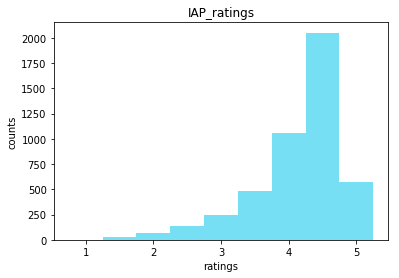

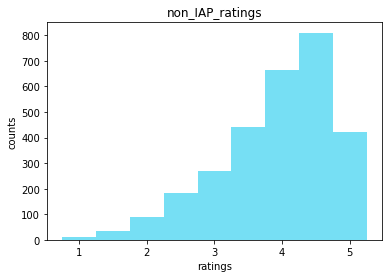

(None, None)

In [13]:
def descritized_bins(data, title, x_label, y_label):
    d = np.diff(np.unique(data)).min()
    left_of_first_bin = data.min() - float(d)/2
    right_of_last_bin = data.max() + float(d)/2
    plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), color = '#3cd2f0', alpha=.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

descritized_bins(IAP_ratings,'IAP_ratings', 'ratings', 'counts'), descritized_bins(non_IAP_ratings,'non_IAP_ratings', 'ratings', 'counts')

In [14]:
str(float('nan')) == 'nan'

True

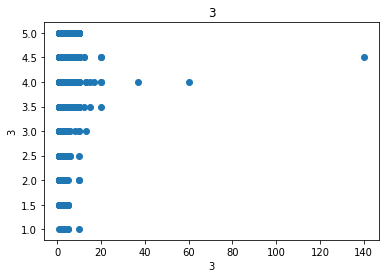

In [15]:
price = data['Price']

paid = []

for i in range(len(price)):
    if str(price[i]) != 'nan' and price[i] != 0 and str(ratings[i]) != 'nan':
        paid.append((price[i], ratings[i]))
paid_price = [i[0] for i in paid]
paid_rating = [i[1] for i in paid]

plt.scatter(paid_price, paid_rating)
plt.xlabel(3)
plt.ylabel(3)
plt.title(3)
plt.show()